# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">Import Libraries </p>

In [1]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from wordcloud import WordCloud
import nltk
import string
import re

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">Load Data </p>

In [2]:
df = pd.read_csv('BBC News Train.csv')
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [4]:
df.shape

(1490, 3)

In [5]:
df.Category.nunique()

5

In [6]:
df.Category.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [7]:
df.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">Data Visualiztion</p>

C:\Users\ubaid\AppData\Local\Temp\ipykernel_10288\3863313560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='viridis')


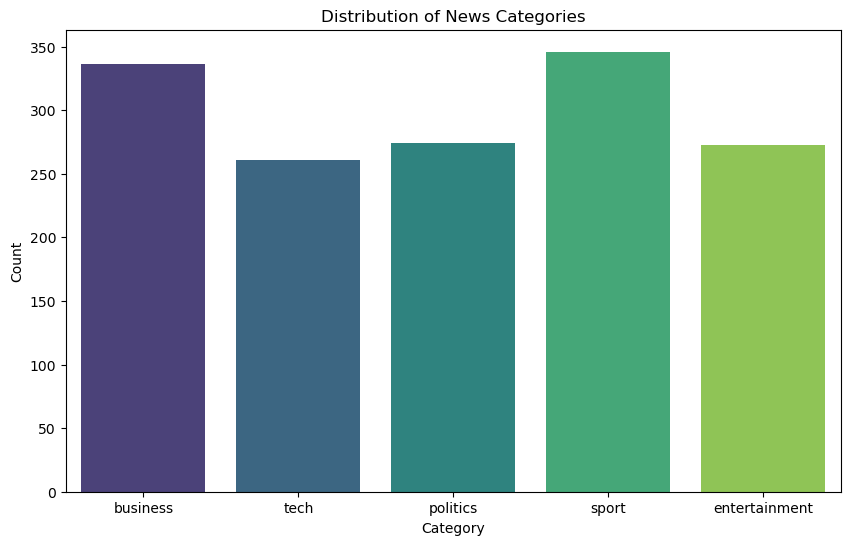

In [8]:
# Bar plot of categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

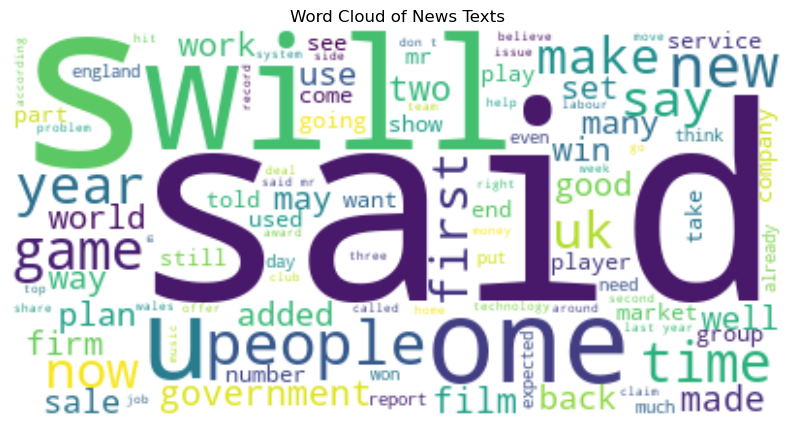

In [9]:
# Word Cloud for the 'Text' column
text = " ".join(article for article in df.Text)
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of News Texts')
plt.show()

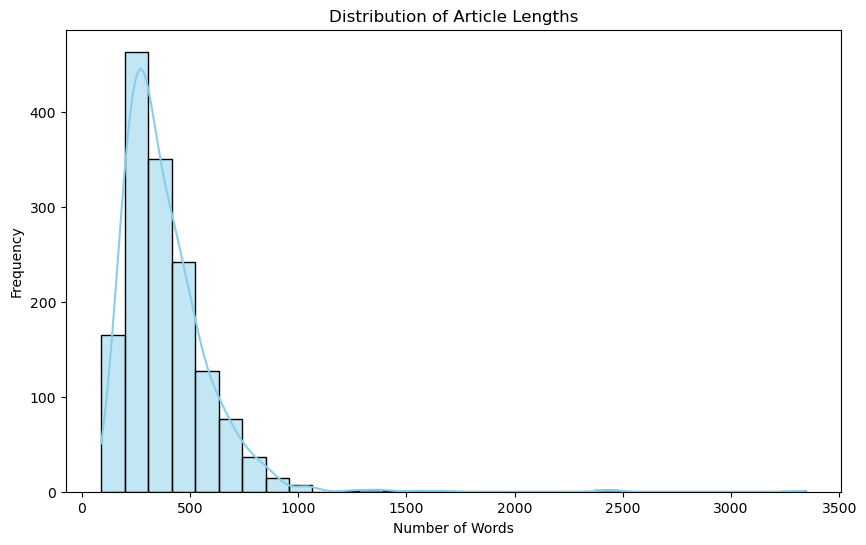

In [10]:
# Calculate the length of each article
df['ArticleLength'] = df['Text'].apply(lambda x: len(x.split()))

# Histogram of article lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['ArticleLength'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">Text Preprocessing </p>

In [11]:
df.head()

,ArticleId,Text,Category,ArticleLength
0,1833,worldcom ex-boss launches defence lawyers defe...,business,301
1,154,german business confidence slides german busin...,business,325
2,1101,bbc poll indicates economic gloom citizens in ...,business,514
3,1976,lifestyle governs mobile choice faster bett...,tech,634
4,917,enron bosses in $168m payout eighteen former e...,business,355


In [12]:
# drop columns >> "Articled" and "ArticleLength"
df = df.drop(columns=["ArticleId", "ArticleLength"])
df.head()

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">1. LowerCasing Text</p>

***Lowercasing text in NLP preprocessing involves converting all letters in a text to lowercase. This step is essential for standardizing text data because it treats words with different cases (e.g., "Word" and "word") as the same, reducing vocabulary size and improving model efficiency. It ensures consistency in word representations, making it easier for algorithms to recognize patterns and associations. For example, "The" and "the" are treated as identical after lowercasing. This normalization simplifies subsequent processing steps, such as tokenization and feature extraction, leading to more accurate and robust NLP models.***


In [13]:
df["Text"][1]

'german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy.  munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january  its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up.   we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner.  the main reason is probably that the domestic economy is still weak  particularly in the retail trade.  economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline . he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue.  germany s economy grew 1.

In [14]:
df['Cleaned_Text'] = df['Text'].str.lower()
df.head()

,Text,Category,Cleaned_Text
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...,business,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...,business,enron bosses in $168m payout eighteen former e...


## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">2. Remove HTML Tags</p>


***Removing HTML tags is an essential step in NLP text preprocessing to ensure that only meaningful textual content is analyzed. HTML tags contain formatting information and metadata irrelevant to linguistic analysis. Including these tags can introduce noise and distort the analysis results. Removing HTML tags helps to extract pure textual data, making it easier to focus on the actual content of the text. This step is particularly crucial when dealing with web data or documents containing HTML markup, as it ensures that the extracted text accurately represents the intended linguistic information for NLP tasks.***

In [15]:
# Import Regular Expression
import re

# Function to remove HTML Tags
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [16]:
# Suppose we have a text Which Contains HTML Tags 
text = "<html><body><p> Movie 1</p><p> Actor - Aamir Khan</p><p> Click here to <a href='http://google.com'>download</a></p></body></html>"
text

"<html><body><p> Movie 1</p><p> Actor - Aamir Khan</p><p> Click here to <a href='http://google.com'>download</a></p></body></html>"

In [17]:
# Apply Function to Remove HTML Tags in our Dataset Colum Review.
remove_html_tags(text)

' Movie 1 Actor - Aamir Khan Click here to download'

**Apply Function to Remove HTML Tags in our Dataset Colum new_Text.**

In [18]:
# Apply Function to Remove HTML Tags.
df['Cleaned_Text'] = df['Cleaned_Text'].apply(remove_html_tags)

In [19]:
df.head()

,Text,Category,Cleaned_Text
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...,business,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...,business,enron bosses in $168m payout eighteen former e...


## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">3. Remove URLs</p>

***In NLP text preprocessing, removing URLs is essential to eliminate irrelevant information that doesn't contribute to linguistic analysis. URLs contain website addresses, hyperlinks, and other web-specific elements that can skew the analysis and confuse machine learning models. By removing URLs, the focus remains on the textual content relevant to the task at hand, enhancing the accuracy of NLP tasks such as sentiment analysis, text classification, and information extraction. This step streamlines the dataset, reduces noise, and ensures that the model's attention is directed towards meaningful linguistic patterns and structures within the text.***

In [20]:
# Here We also Use Regular Expressions to Remove URLs from Text or Whole Corpus.
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [21]:
# Suppose we have the FOllowings Text With URL.
text1 = 'Check out my notebook https://www.kaggle.com/campusx/notebook8223fc1abb'
text2 = 'Check out my notebook http://www.kaggle.com/campusx/notebook8223fc1abb'

In [22]:
# Lets Remove The URL by Calling Function
print(remove_url(text1))
print(remove_url(text2))

Check out my notebook 
Check out my notebook 


**Apply Function to Remove URL Tags in our Dataset Colum new_Text.**

In [23]:
df['Cleaned_Text'] = df['Cleaned_Text'].apply(remove_url)
df.head()

,Text,Category,Cleaned_Text
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...,business,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...,business,enron bosses in $168m payout eighteen former e...


## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">4. Remove Punctuations</p>


***Removing punctuation marks is essential in NLP text preprocessing to enhance the accuracy and efficiency of analysis. Punctuation marks like commas, periods, and quotation marks carry little semantic meaning and can introduce noise into the dataset. By removing them, the text becomes cleaner and more uniform, making it easier for machine learning models to extract meaningful features and patterns. Additionally, removing punctuation aids in standardizing the text, ensuring consistency across documents and improving the overall performance of NLP tasks such as sentiment analysis, text classification, and named entity recognition.***

In [24]:
# From String we Imorts Punctuation.
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
# Storing Punctuation in a Variable
punc = string.punctuation

In [26]:
''' The code defines a function, remove_punc, that takes a text input and removes all punctuation characters from it using the translate method 
with a translation table created by str.maketrans. This function effectively cleanses the text of punctuation symbols.'''

def remove_punc(text):
    return text.translate(str.maketrans('', '', punc))

In [27]:
# Text With Punctuation.
text3 = "!The quick brown fox jumps over the lazy dog. However, the dog doesn't seem impressed! Oh no, it just yawned. How disappointing! Maybe a squirrel would elicit a reaction. Alas, the fox is out of luck."
text3

"!The quick brown fox jumps over the lazy dog. However, the dog doesn't seem impressed! Oh no, it just yawned. How disappointing! Maybe a squirrel would elicit a reaction. Alas, the fox is out of luck."

In [28]:
# Remove Punctuation.
remove_punc(text3)

'The quick brown fox jumps over the lazy dog However the dog doesnt seem impressed Oh no it just yawned How disappointing Maybe a squirrel would elicit a reaction Alas the fox is out of luck'

***Hence the function removes the punctuations from the text and we can also use this function to remove the punctuations from the corpus.***

In [29]:
df['Cleaned_Text'] = df['Cleaned_Text'].apply(remove_punc)
df.head()

,Text,Category,Cleaned_Text
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...
1,german business confidence slides german busin...,business,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...,business,enron bosses in 168m payout eighteen former en...


## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">5. Handling ChatWords</p>


***Handling ChatWords, also known as internet slang or informal language used in online communication, is important in NLP text preprocessing to ensure accurate analysis and understanding of text data. By converting ChatWords into their standard English equivalents or formal language equivalents, NLP models can effectively interpret the meaning of the text. This preprocessing step helps in maintaining consistency, improving the quality of input data, and enhancing the performance of NLP tasks such as sentiment analysis, chatbots, and information retrieval systems. Ultimately, handling ChatWords ensures better comprehension and more reliable results in NLP applications.***

In [30]:
# Here Come ChatWords Which i Get from a Github Repository
# Repository Link : https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}


***The code defines a function, chat_conversion, that replaces text with their corresponding chat acronyms from a predefined dictionary. It iterates through each word in the input text, checks if it exists in the dictionary, and replaces it if found. The modified text is then returned.***

In [31]:
# Function
def chat_conversion(text):
    new_text = []
    for i in text.split():
        if i.upper() in chat_words:
            new_text.append(chat_words[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

In [32]:
# Text
text4 = 'IMHO he is the best'
text5 = 'FYI Islamabad is the capital of Pakistan'
# Calling function
print(chat_conversion(text4))
print(chat_conversion(text5))

In My Honest/Humble Opinion he is the best
For Your Information Islamabad is the capital of Pakistan


***Well this is how we Handle ChatWords in Our Data Simple u have to call the above Function.*** 

In [33]:
df['Cleaned_Text'] = df['Cleaned_Text'].apply(chat_conversion)
df.head()

,Text,Category,Cleaned_Text
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...
1,german business confidence slides german busin...,business,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,enron bosses in $168m payout eighteen former e...,business,enron bosses in 168m payout eighteen former en...


## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">6. Handling StopWords</p>

***In NLP text preprocessing, removing stop words is crucial to enhance the quality and efficiency of analysis. Stop words are common words like "the," "is," and "and," which appear frequently in text but carry little semantic meaning. By eliminating stop words, we reduce noise in the data, decrease the dimensionality of the dataset, and improve the accuracy of NLP tasks such as sentiment analysis, topic modeling, and text classification. This process streamlines the analysis by focusing on the significant words that carry more meaningful information, leading to better model performance and interpretation of results.***

In [34]:
import nltk
# nltk.download('stopwords')

In [35]:
# We use NLTK library to remove Stopwords.
from nltk.corpus import stopwords

In [36]:
# Here we can see all the stopwords in English.However we can chose different Languages also like spanish etc.
stopword = stopwords.words('english')

***The code defines a function, remove_stopwords, which removes stopwords from a given text. It iterates through each word in the text, checks if it is a stopword, and appends it to a new list if it is not. Then, it clears the original list, returns the modified text.***

In [37]:
# Function
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopword:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [38]:
# Text
text6 = 'probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. it just never gets old, despite my having seen it some 15 or more times'
print(f'Text With Stop Words :{text}')
# Calling Function
remove_stopwords(text6)

Text With Stop Words :<html><body><p> Movie 1</p><p> Actor - Aamir Khan</p><p> Click here to <a href='http://google.com'>download</a></p></body></html>


'probably  all-time favorite movie,  story  selflessness, sacrifice  dedication   noble cause,    preachy  boring.   never gets old, despite   seen   15   times'

***We can Apply the same Function on Whole Corpus also***

In [39]:
df['Cleaned_Text'] = df['Cleaned_Text'].apply(remove_stopwords)
df.head()

,Text,Category,Cleaned_Text
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...
1,german business confidence slides german busin...,business,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens m...
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,enron bosses in $168m payout eighteen former e...,business,enron bosses 168m payout eighteen former enro...


## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">7. Tokenization </p>

***Tokenization is a crucial step in NLP text preprocessing where text is segmented into smaller units, typically words or subwords, known as tokens. This process is essential for several reasons. Firstly, it breaks down the text into manageable units for analysis and processing. Secondly, it standardizes the representation of words, enabling consistency in language modeling tasks. Additionally, tokenization forms the basis for feature extraction and modeling in NLP, facilitating tasks such as sentiment analysis, named entity recognition, and machine translation. Overall, tokenization plays a fundamental role in preparing text data for further analysis and modeling in NLP applications.***

***We Generally do 2 Type of tokenization 1. Word tokenization 2. Sentence Tokenization***

In [40]:
from nltk.tokenize import word_tokenize

df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda x:word_tokenize(x))
df.rename(columns={'Cleaned_Text': 'tokenized_words'}, inplace=True)
df.head()

,Text,Category,tokenized_words
0,worldcom ex-boss launches defence lawyers defe...,business,"[worldcom, exboss, launches, defence, lawyers,..."
1,german business confidence slides german busin...,business,"[german, business, confidence, slides, german,..."
2,bbc poll indicates economic gloom citizens in ...,business,"[bbc, poll, indicates, economic, gloom, citize..."
3,lifestyle governs mobile choice faster bett...,tech,"[lifestyle, governs, mobile, choice, faster, b..."
4,enron bosses in $168m payout eighteen former e...,business,"[enron, bosses, 168m, payout, eighteen, former..."


In [41]:
df.tokenized_words[0]

['worldcom',
 'exboss',
 'launches',
 'defence',
 'lawyers',
 'defending',
 'former',
 'worldcom',
 'chief',
 'bernie',
 'ebbers',
 'battery',
 'fraud',
 'charges',
 'called',
 'company',
 'whistleblower',
 'first',
 'witness',
 'cynthia',
 'cooper',
 'worldcom',
 'exhead',
 'internal',
 'accounting',
 'alerted',
 'directors',
 'irregular',
 'accounting',
 'practices',
 'us',
 'telecoms',
 'giant',
 '2002',
 'warnings',
 'led',
 'collapse',
 'firm',
 'following',
 'discovery',
 '11bn',
 '£57bn',
 'accounting',
 'fraud',
 'mr',
 'ebbers',
 'pleaded',
 'guilty',
 'charges',
 'fraud',
 'conspiracy',
 'prosecution',
 'lawyers',
 'argued',
 'mr',
 'ebbers',
 'orchestrated',
 'series',
 'accounting',
 'tricks',
 'worldcom',
 'ordering',
 'employees',
 'hide',
 'expenses',
 'inflate',
 'revenues',
 'meet',
 'wall',
 'street',
 'earnings',
 'estimates',
 'ms',
 'cooper',
 'runs',
 'consulting',
 'business',
 'told',
 'jury',
 'new',
 'york',
 'wednesday',
 'external',
 'auditors',
 'arthur',
 

## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">8. Lemmatization </p>


***Lemmatization is performed in NLP text preprocessing to reduce words to their base or dictionary form (lemma), enhancing consistency and simplifying analysis. Unlike stemming, which truncates words to their root form without considering meaning, lemmatization ensures that words are transformed to their canonical form, considering their part of speech. This process aids in reducing redundancy, improving text normalization, and enhancing the accuracy of downstream NLP tasks such as sentiment analysis, topic modeling, and information retrieval. Overall, lemmatization contributes to refining text data, facilitating more effective linguistic analysis and machine learning model performance.***

In [42]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')

In [43]:
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get the POS tag for more accurate lemmatization
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Function to lemmatize each token
def lemmatize_words(tokenized_words):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokenized_words]


In [44]:
df['tokenized_words'] = df['tokenized_words'].apply(lemmatize_words)
df.rename(columns={'tokenized_words': 'lemmatized_words'}, inplace=True)
df.head()

,Text,Category,lemmatized_words
0,worldcom ex-boss launches defence lawyers defe...,business,"[worldcom, exboss, launch, defence, lawyer, de..."
1,german business confidence slides german busin...,business,"[german, business, confidence, slide, german, ..."
2,bbc poll indicates economic gloom citizens in ...,business,"[bbc, poll, indicates, economic, gloom, citize..."
3,lifestyle governs mobile choice faster bett...,tech,"[lifestyle, governs, mobile, choice, faster, w..."
4,enron bosses in $168m payout eighteen former e...,business,"[enron, boss, 168m, payout, eighteen, former, ..."


#### <p style="font-family:newtimeroman;font-size:150%;text-align:left;color:#8b4513;">Join the tokenized words </p>

In [45]:
df['lemmatized_words']= df['lemmatized_words'].apply(lambda x:' '.join(x))
df.rename(columns={'lemmatized_words': 'Cleaned_Text'}, inplace=True)
df.head()

,Text,Category,Cleaned_Text
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launch defence lawyer defend f...
1,german business confidence slides german busin...,business,german business confidence slide german busine...
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizen majo...
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster well fu...
4,enron bosses in $168m payout eighteen former e...,business,enron boss 168m payout eighteen former enron d...


In [46]:
df["Text"][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

In [47]:
df["Cleaned_Text"][0]

'worldcom exboss launch defence lawyer defend former worldcom chief bernie ebbers battery fraud charge call company whistleblower first witness cynthia cooper worldcom exhead internal accounting alert director irregular accounting practice u telecom giant 2002 warning lead collapse firm follow discovery 11bn £57bn accounting fraud mr ebbers plead guilty charge fraud conspiracy prosecution lawyer argue mr ebbers orchestrate series accounting trick worldcom order employee hide expense inflate revenue meet wall street earnings estimate m cooper run consult business told jury new york wednesday external auditor arthur andersen approve worldcom accounting early 2001 2002 say andersen give green light procedure practice use worldcom mr ebber lawyer say unaware fraud argue auditor alert problem m cooper also say shareholder meeting mr ebbers often pass technical question company finance chief give brief answer prosecution star witness former worldcom financial chief scott sullivan say mr ebbe

## Save Dataframe as CSV

In [48]:
# df.to_csv('BBC_Cleaned_Text.csv', index=False)

In [49]:
df.head()

,Text,Category,Cleaned_Text
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launch defence lawyer defend f...
1,german business confidence slides german busin...,business,german business confidence slide german busine...
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizen majo...
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster well fu...
4,enron bosses in $168m payout eighteen former e...,business,enron boss 168m payout eighteen former enron d...


## Load The new Cleand Dataset

In [50]:
df = pd.read_csv('BBC_Cleaned_Text.csv')
df.head()

,Text,Category,Cleaned_Text
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launch defence lawyer defend f...
1,german business confidence slides german busin...,business,german business confidence slide german busine...
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizen majo...
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster well fu...
4,enron bosses in $168m payout eighteen former e...,business,enron boss 168m payout eighteen former enron d...


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Text          1490 non-null   object
 1   Category      1490 non-null   object
 2   Cleaned_Text  1490 non-null   object
dtypes: object(3)
memory usage: 35.1+ KB


In [52]:
df.shape

(1490, 3)

In [53]:
df['Category'].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

# Vectorization
    - Vatorization for unigram, bigram and trigram

In [54]:
# Vectorization using CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(df['Cleaned_Text'])
y = df['Category']

# Split the Data

In [55]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train.shape

(1192, 538435)

In [57]:
X_test.shape

(298, 538435)

In [58]:
y_train.shape

(1192,)

In [59]:
y_test.shape

(298,)

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">Train and Evaluate Multiple Classifiers</p>

***1. Naive Bayes***

***2. Logistic Regression***

***3. Support Vector Machine***

***4. Random Forest***

***5. K-Nearest Neighbors***


## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">Unigram Model for All Classifiers</p>



Naive Bayes (Unigram) - Classification Report
               precision    recall  f1-score   support

     business       0.99      0.97      0.98        75
entertainment       1.00      0.98      0.99        46
     politics       0.96      0.98      0.97        56
        sport       1.00      1.00      1.00        63
         tech       0.97      0.98      0.97        58

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



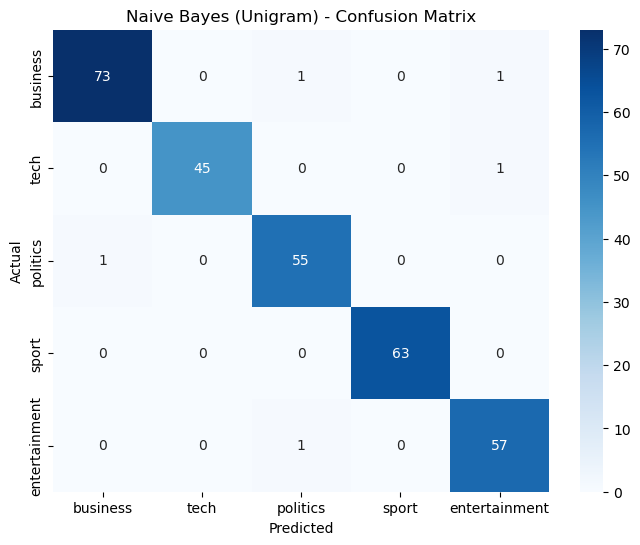

Logistic Regression (Unigram) - Classification Report
               precision    recall  f1-score   support

     business       0.95      0.99      0.97        75
entertainment       0.94      0.98      0.96        46
     politics       0.96      0.93      0.95        56
        sport       0.97      1.00      0.98        63
         tech       1.00      0.91      0.95        58

     accuracy                           0.96       298
    macro avg       0.96      0.96      0.96       298
 weighted avg       0.96      0.96      0.96       298



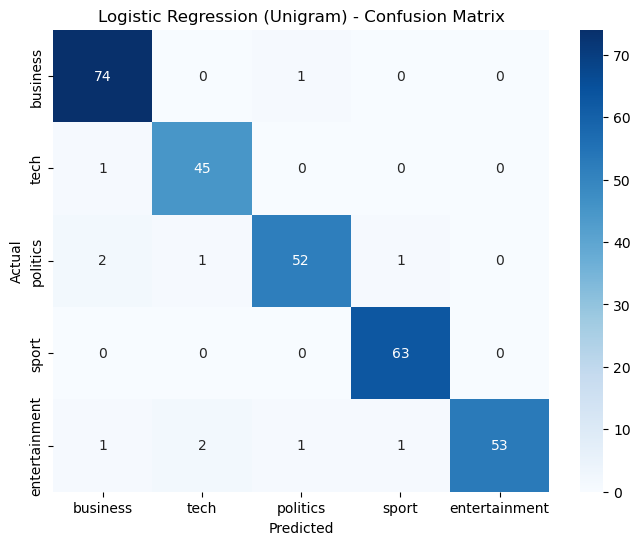

SVM (Unigram) - Classification Report
               precision    recall  f1-score   support

     business       0.97      0.97      0.97        75
entertainment       0.94      0.96      0.95        46
     politics       0.96      0.91      0.94        56
        sport       0.98      0.98      0.98        63
         tech       0.92      0.95      0.93        58

     accuracy                           0.96       298
    macro avg       0.95      0.95      0.95       298
 weighted avg       0.96      0.96      0.96       298



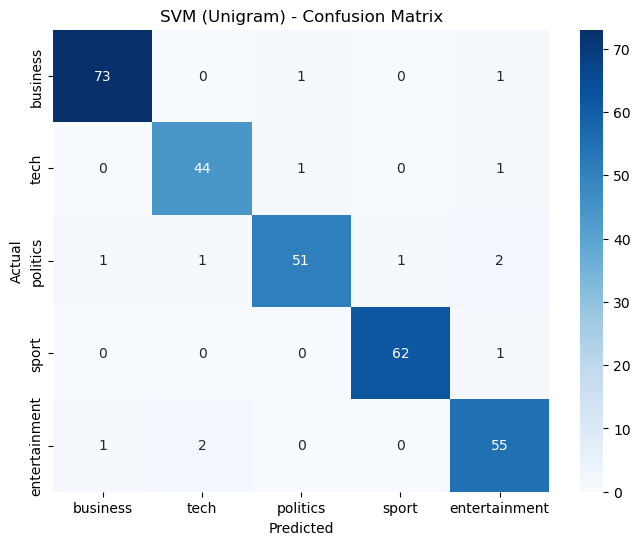

Random Forest (Unigram) - Classification Report
               precision    recall  f1-score   support

     business       0.94      0.99      0.96        75
entertainment       0.92      0.96      0.94        46
     politics       0.98      0.96      0.97        56
        sport       1.00      1.00      1.00        63
         tech       1.00      0.91      0.95        58

     accuracy                           0.97       298
    macro avg       0.97      0.96      0.97       298
 weighted avg       0.97      0.97      0.97       298



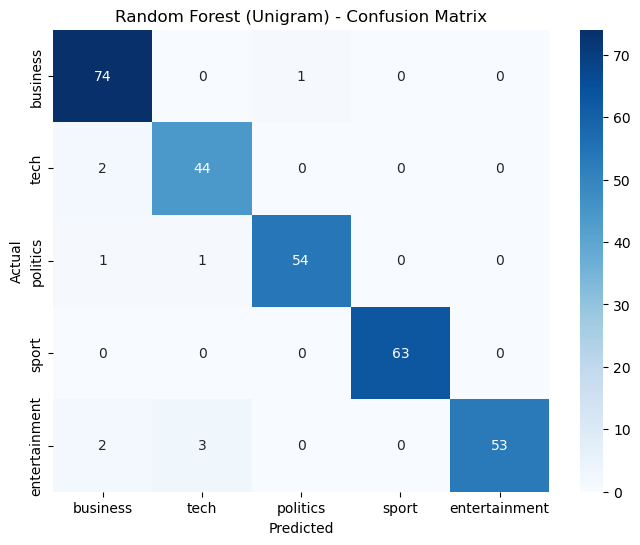

KNN (Unigram) - Classification Report
               precision    recall  f1-score   support

     business       1.00      0.52      0.68        75
entertainment       0.79      0.59      0.68        46
     politics       0.86      0.79      0.82        56
        sport       0.40      1.00      0.57        63
         tech       1.00      0.28      0.43        58

     accuracy                           0.63       298
    macro avg       0.81      0.63      0.64       298
 weighted avg       0.82      0.63      0.64       298



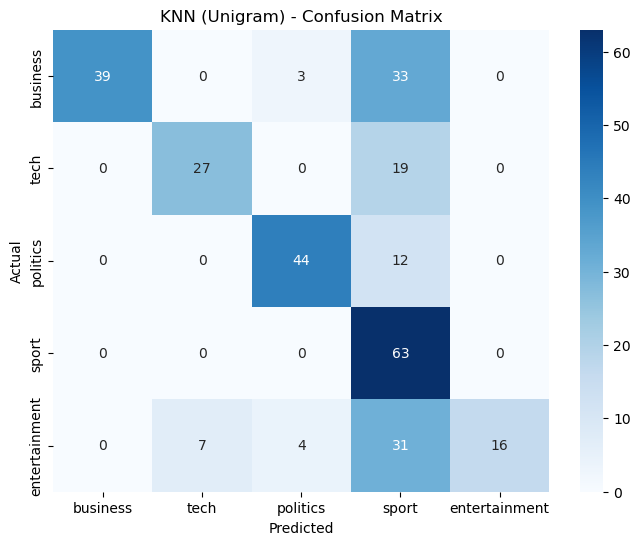

In [60]:
# Unigram Model
vectorizer_uni = CountVectorizer(ngram_range=(1, 1))
X_uni = vectorizer_uni.fit_transform(df['Cleaned_Text'])

# Splitting the data into training and testing sets
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(X_uni, df['Category'], test_size=0.2, random_state=42)

# Naive Bayes
nb_model_uni = MultinomialNB()
nb_model_uni.fit(X_train_uni, y_train_uni)
nb_pred_uni = nb_model_uni.predict(X_test_uni)
print("Naive Bayes (Unigram) - Classification Report")
print(classification_report(y_test_uni, nb_pred_uni))
nb_cm_uni = confusion_matrix(y_test_uni, nb_pred_uni)
plt.figure(figsize=(8,6))
sns.heatmap(nb_cm_uni, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.title('Naive Bayes (Unigram) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression
logistic_model_uni = LogisticRegression(max_iter=1000)
logistic_model_uni.fit(X_train_uni, y_train_uni)
logistic_pred_uni = logistic_model_uni.predict(X_test_uni)
print("Logistic Regression (Unigram) - Classification Report")
print(classification_report(y_test_uni, logistic_pred_uni))
logistic_cm_uni = confusion_matrix(y_test_uni, logistic_pred_uni)
plt.figure(figsize=(8,6))
sns.heatmap(logistic_cm_uni, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.title('Logistic Regression (Unigram) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Support Vector Machine
svm_model_uni = SVC()
svm_model_uni.fit(X_train_uni, y_train_uni)
svm_pred_uni = svm_model_uni.predict(X_test_uni)
print("SVM (Unigram) - Classification Report")
print(classification_report(y_test_uni, svm_pred_uni))
svm_cm_uni = confusion_matrix(y_test_uni, svm_pred_uni)
plt.figure(figsize=(8,6))
sns.heatmap(svm_cm_uni, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.title('SVM (Unigram) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest
rf_model_uni = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_uni.fit(X_train_uni, y_train_uni)
rf_pred_uni = rf_model_uni.predict(X_test_uni)
print("Random Forest (Unigram) - Classification Report")
print(classification_report(y_test_uni, rf_pred_uni))
rf_cm_uni = confusion_matrix(y_test_uni, rf_pred_uni)
plt.figure(figsize=(8,6))
sns.heatmap(rf_cm_uni, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.title('Random Forest (Unigram) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# K-Nearest Neighbors
knn_model_uni = KNeighborsClassifier(n_neighbors=5)
knn_model_uni.fit(X_train_uni, y_train_uni)
knn_pred_uni = knn_model_uni.predict(X_test_uni)
print("KNN (Unigram) - Classification Report")
print(classification_report(y_test_uni, knn_pred_uni))
knn_cm_uni = confusion_matrix(y_test_uni, knn_pred_uni)
plt.figure(figsize=(8,6))
sns.heatmap(knn_cm_uni, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.title('KNN (Unigram) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">Bigram Model for All Classifiers</p>

Naive Bayes (Bigram) - Classification Report
               precision    recall  f1-score   support

     business       1.00      0.96      0.98        75
entertainment       0.96      0.98      0.97        46
     politics       0.89      0.98      0.93        56
        sport       0.98      0.98      0.98        63
         tech       0.98      0.91      0.95        58

     accuracy                           0.96       298
    macro avg       0.96      0.96      0.96       298
 weighted avg       0.97      0.96      0.96       298



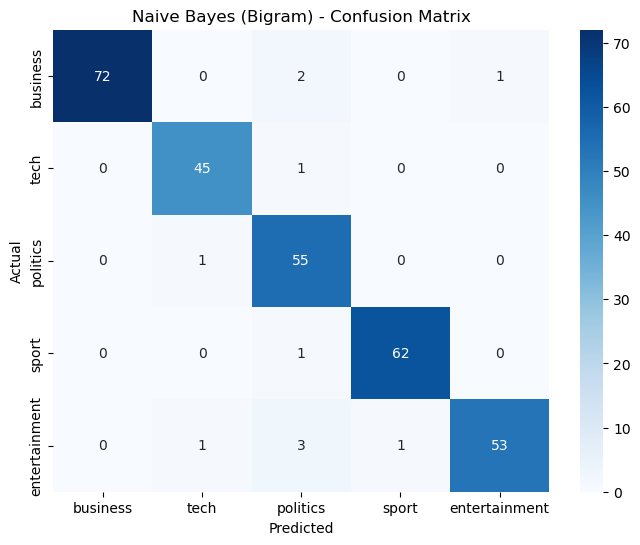

Logistic Regression (Bigram) - Classification Report
               precision    recall  f1-score   support

     business       0.88      0.96      0.92        75
entertainment       0.91      0.87      0.89        46
     politics       1.00      0.89      0.94        56
        sport       0.80      1.00      0.89        63
         tech       0.98      0.72      0.83        58

     accuracy                           0.90       298
    macro avg       0.91      0.89      0.89       298
 weighted avg       0.91      0.90      0.89       298



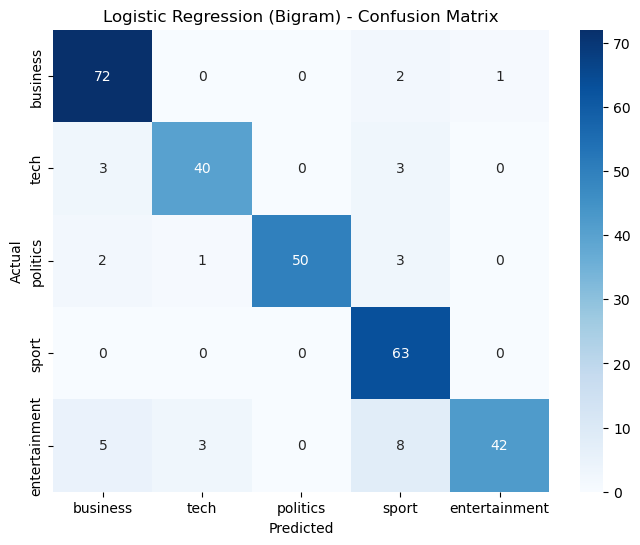

SVM (Bigram) - Classification Report
               precision    recall  f1-score   support

     business       0.68      0.61      0.64        75
entertainment       1.00      0.30      0.47        46
     politics       1.00      0.61      0.76        56
        sport       0.46      0.89      0.61        63
         tech       0.66      0.69      0.67        58

     accuracy                           0.64       298
    macro avg       0.76      0.62      0.63       298
 weighted avg       0.74      0.64      0.64       298



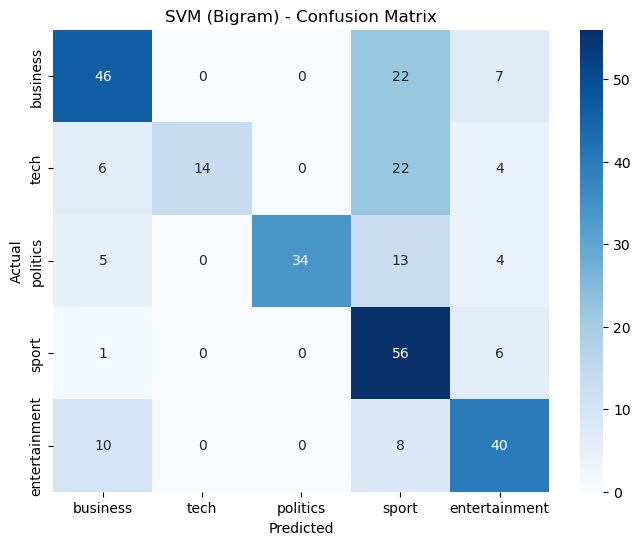

Random Forest (Bigram) - Classification Report
               precision    recall  f1-score   support

     business       0.75      0.99      0.85        75
entertainment       0.95      0.78      0.86        46
     politics       1.00      0.89      0.94        56
        sport       0.86      0.97      0.91        63
         tech       0.97      0.67      0.80        58

     accuracy                           0.87       298
    macro avg       0.91      0.86      0.87       298
 weighted avg       0.89      0.87      0.87       298



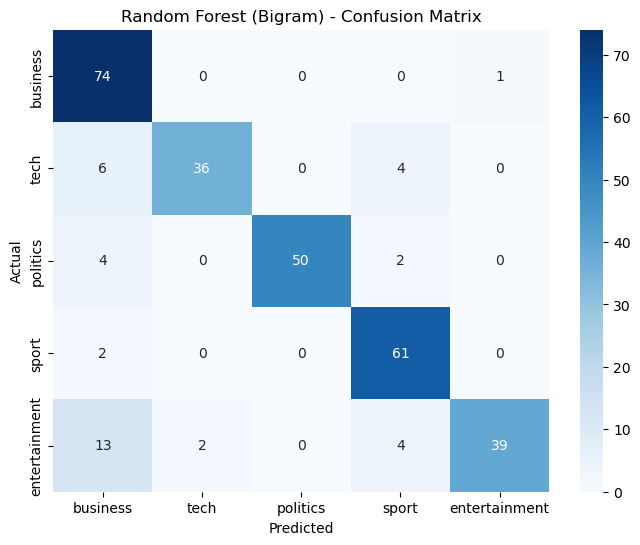

KNN (Bigram) - Classification Report
               precision    recall  f1-score   support

     business       1.00      0.01      0.03        75
entertainment       1.00      0.02      0.04        46
     politics       1.00      0.14      0.25        56
        sport       0.22      1.00      0.36        63
         tech       0.00      0.00      0.00        58

     accuracy                           0.24       298
    macro avg       0.64      0.24      0.14       298
 weighted avg       0.64      0.24      0.14       298



C:\Users\ubaid\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ubaid\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ubaid\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


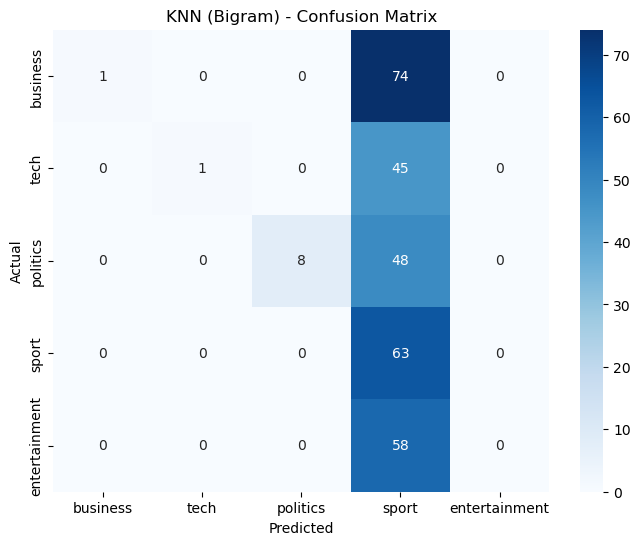

In [61]:
# Bigram Model
vectorizer_bi = CountVectorizer(ngram_range=(2, 2))
X_bi = vectorizer_bi.fit_transform(df['Cleaned_Text'])

# Splitting the data into training and testing sets
X_train_bi, X_test_bi, y_train_bi, y_test_bi = train_test_split(X_bi, df['Category'], test_size=0.2, random_state=42)

# Naive Bayes
nb_model_bi = MultinomialNB()
nb_model_bi.fit(X_train_bi, y_train_bi)
nb_pred_bi = nb_model_bi.predict(X_test_bi)
print("Naive Bayes (Bigram) - Classification Report")
print(classification_report(y_test_bi, nb_pred_bi))
nb_cm_bi = confusion_matrix(y_test_bi, nb_pred_bi)
plt.figure(figsize=(8,6))
sns.heatmap(nb_cm_bi, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.title('Naive Bayes (Bigram) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression
logistic_model_bi = LogisticRegression(max_iter=1000)
logistic_model_bi.fit(X_train_bi, y_train_bi)
logistic_pred_bi = logistic_model_bi.predict(X_test_bi)
print("Logistic Regression (Bigram) - Classification Report")
print(classification_report(y_test_bi, logistic_pred_bi))
logistic_cm_bi = confusion_matrix(y_test_bi, logistic_pred_bi)
plt.figure(figsize=(8,6))
sns.heatmap(logistic_cm_bi, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.title('Logistic Regression (Bigram) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Support Vector Machine
svm_model_bi = SVC()
svm_model_bi.fit(X_train_bi, y_train_bi)
svm_pred_bi = svm_model_bi.predict(X_test_bi)
print("SVM (Bigram) - Classification Report")
print(classification_report(y_test_bi, svm_pred_bi))
svm_cm_bi = confusion_matrix(y_test_bi, svm_pred_bi)
plt.figure(figsize=(8,6))
sns.heatmap(svm_cm_bi, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.title('SVM (Bigram) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest
rf_model_bi = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_bi.fit(X_train_bi, y_train_bi)
rf_pred_bi = rf_model_bi.predict(X_test_bi)
print("Random Forest (Bigram) - Classification Report")
print(classification_report(y_test_bi, rf_pred_bi))
rf_cm_bi = confusion_matrix(y_test_bi, rf_pred_bi)
plt.figure(figsize=(8,6))
sns.heatmap(rf_cm_bi, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.title('Random Forest (Bigram) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# K-Nearest Neighbors
knn_model_bi = KNeighborsClassifier(n_neighbors=5)
knn_model_bi.fit(X_train_bi, y_train_bi)
knn_pred_bi = knn_model_bi.predict(X_test_bi)
print("KNN (Bigram) - Classification Report")
print(classification_report(y_test_bi, knn_pred_bi))
knn_cm_bi = confusion_matrix(y_test_bi, knn_pred_bi)
plt.figure(figsize=(8,6))
sns.heatmap(knn_cm_bi, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.title('KNN (Bigram) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">Trigram Model for All Classifiers</p>


Naive Bayes (Trigram) - Classification Report
               precision    recall  f1-score   support

     business       1.00      0.63      0.77        75
entertainment       0.35      1.00      0.52        46
     politics       0.98      0.80      0.88        56
        sport       1.00      0.75      0.85        63
         tech       0.96      0.47      0.63        58

     accuracy                           0.71       298
    macro avg       0.86      0.73      0.73       298
 weighted avg       0.89      0.71      0.74       298



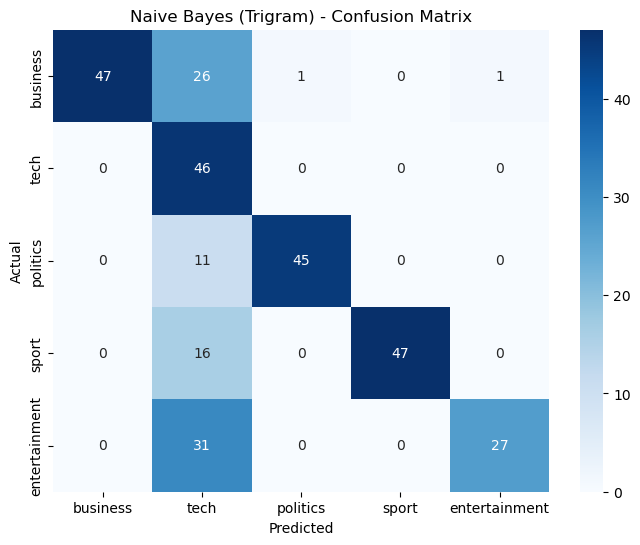

Logistic Regression (Trigram) - Classification Report
               precision    recall  f1-score   support

     business       1.00      0.47      0.64        75
entertainment       1.00      0.22      0.36        46
     politics       1.00      0.46      0.63        56
        sport       0.31      1.00      0.47        63
         tech       1.00      0.36      0.53        58

     accuracy                           0.52       298
    macro avg       0.86      0.50      0.53       298
 weighted avg       0.85      0.52      0.54       298



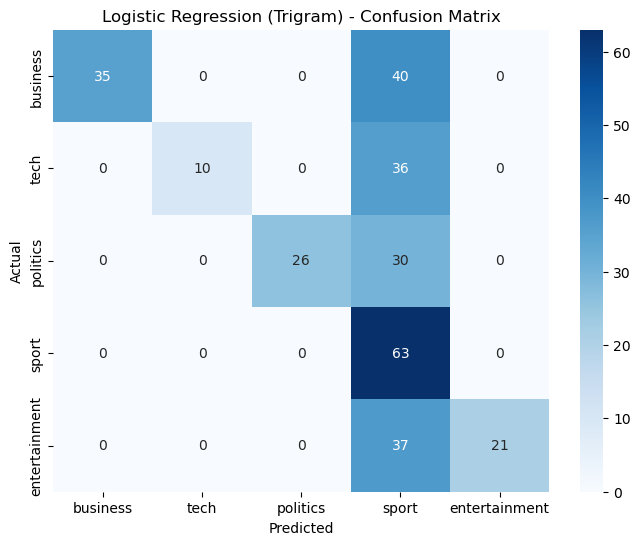

SVM (Trigram) - Classification Report
               precision    recall  f1-score   support

     business       0.43      0.20      0.27        75
entertainment       1.00      0.09      0.16        46
     politics       0.42      0.36      0.38        56
        sport       0.29      0.75      0.42        63
         tech       0.62      0.53      0.57        58

     accuracy                           0.39       298
    macro avg       0.55      0.38      0.36       298
 weighted avg       0.52      0.39      0.37       298



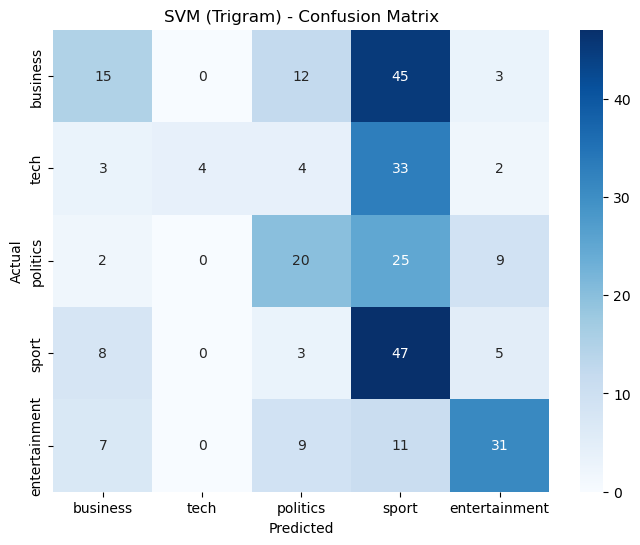

Random Forest (Trigram) - Classification Report
               precision    recall  f1-score   support

     business       0.37      0.97      0.53        75
entertainment       1.00      0.13      0.23        46
     politics       0.97      0.55      0.70        56
        sport       0.94      0.49      0.65        63
         tech       0.93      0.47      0.62        58

     accuracy                           0.56       298
    macro avg       0.84      0.52      0.55       298
 weighted avg       0.81      0.56      0.56       298



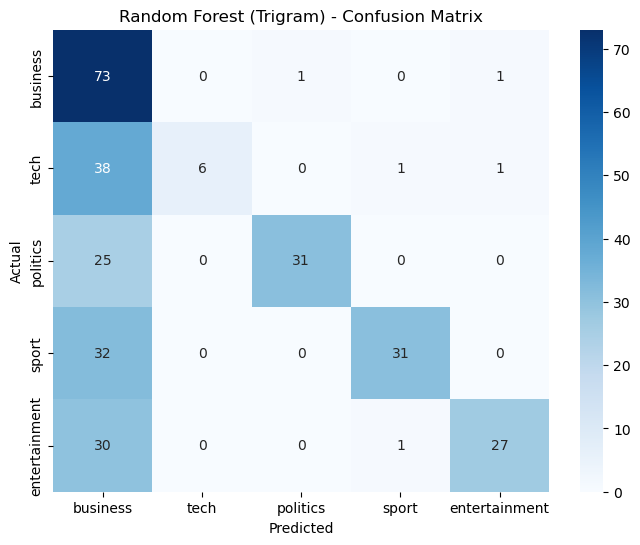

KNN (Trigram) - Classification Report
               precision    recall  f1-score   support

     business       0.00      0.00      0.00        75
entertainment       0.00      0.00      0.00        46
     politics       1.00      0.04      0.07        56
        sport       0.21      1.00      0.35        63
         tech       0.00      0.00      0.00        58

     accuracy                           0.22       298
    macro avg       0.24      0.21      0.08       298
 weighted avg       0.23      0.22      0.09       298



C:\Users\ubaid\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ubaid\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ubaid\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


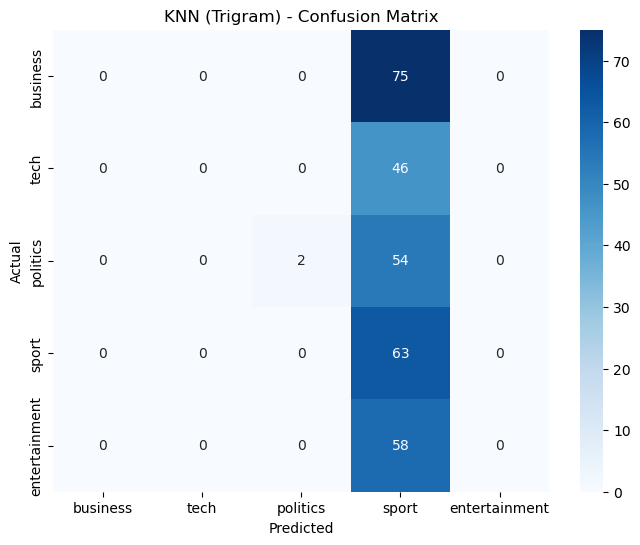

In [62]:
# Trigram Model
vectorizer_tri = CountVectorizer(ngram_range=(3, 3))
X_tri = vectorizer_tri.fit_transform(df['Cleaned_Text'])

# Splitting the data into training and testing sets
X_train_tri, X_test_tri, y_train_tri, y_test_tri = train_test_split(X_tri, df['Category'], test_size=0.2, random_state=42)

# Naive Bayes
nb_model_tri = MultinomialNB()
nb_model_tri.fit(X_train_tri, y_train_tri)
nb_pred_tri = nb_model_tri.predict(X_test_tri)
print("Naive Bayes (Trigram) - Classification Report")
print(classification_report(y_test_tri, nb_pred_tri))
nb_cm_tri = confusion_matrix(y_test_tri, nb_pred_tri)
plt.figure(figsize=(8,6))
sns.heatmap(nb_cm_tri, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.title('Naive Bayes (Trigram) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression
logistic_model_tri = LogisticRegression(max_iter=1000)
logistic_model_tri.fit(X_train_tri, y_train_tri)
logistic_pred_tri = logistic_model_tri.predict(X_test_tri)
print("Logistic Regression (Trigram) - Classification Report")
print(classification_report(y_test_tri, logistic_pred_tri))
logistic_cm_tri = confusion_matrix(y_test_tri, logistic_pred_tri)
plt.figure(figsize=(8,6))
sns.heatmap(logistic_cm_tri, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.title('Logistic Regression (Trigram) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Support Vector Machine
svm_model_tri = SVC()
svm_model_tri.fit(X_train_tri, y_train_tri)
svm_pred_tri = svm_model_tri.predict(X_test_tri)
print("SVM (Trigram) - Classification Report")
print(classification_report(y_test_tri, svm_pred_tri))
svm_cm_tri = confusion_matrix(y_test_tri, svm_pred_tri)
plt.figure(figsize=(8,6))
sns.heatmap(svm_cm_tri, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.title('SVM (Trigram) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest
rf_model_tri = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_tri.fit(X_train_tri, y_train_tri)
rf_pred_tri = rf_model_tri.predict(X_test_tri)
print("Random Forest (Trigram) - Classification Report")
print(classification_report(y_test_tri, rf_pred_tri))
rf_cm_tri = confusion_matrix(y_test_tri, rf_pred_tri)
plt.figure(figsize=(8,6))
sns.heatmap(rf_cm_tri, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.title('Random Forest (Trigram) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# K-Nearest Neighbors
knn_model_tri = KNeighborsClassifier(n_neighbors=5)
knn_model_tri.fit(X_train_tri, y_train_tri)
knn_pred_tri = knn_model_tri.predict(X_test_tri)
print("KNN (Trigram) - Classification Report")
print(classification_report(y_test_tri, knn_pred_tri))
knn_cm_tri = confusion_matrix(y_test_tri, knn_pred_tri)
plt.figure(figsize=(8,6))
sns.heatmap(knn_cm_tri, annot=True, fmt='d', cmap='Blues', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.title('KNN (Trigram) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
